# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [232]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy.random as random
from scipy import stats
import statsmodels.api as sm

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#def draw_bs_reps(data, func, size=1):
#    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps



In [233]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [234]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


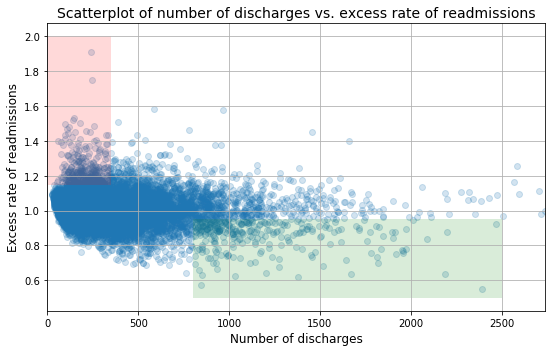

In [235]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [236]:
# Your turn

In [237]:
df = pd.concat([clean_hospital_read_df.iloc[81:-3, 4], clean_hospital_read_df.iloc[81:-3, 6]], axis=1, keys=['dis', 'exs'])
df.reset_index(drop=True)
df.sort_values(by=['dis'], inplace=True)
df.describe()

,dis,exs
count,11494.000000,11494.000000
mean,364.313729,1.007541
std,299.546395,0.091912
min,25.000000,0.549500
25%,159.250000,0.952700
50%,281.000000,1.003550
75%,474.000000,1.058075
max,2740.000000,1.909500


In [238]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [239]:
x, y = ecdf(df.exs)

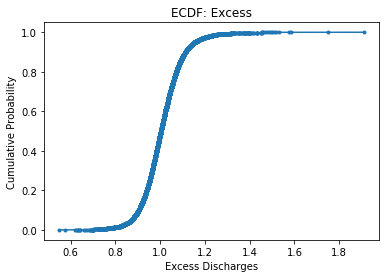

In [240]:
_ = plt.plot(x, y, marker='.')

_ = plt.title('ECDF: Excess')
_ = plt.xlabel('Excess Discharges')
_ = plt.ylabel('Cumulative Probability')

plt.show()

In [241]:
x, y = ecdf(df.dis)

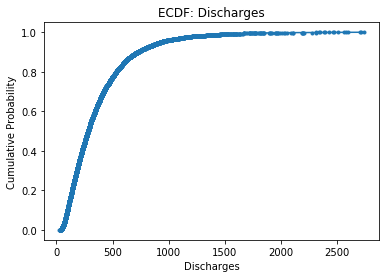

In [242]:
_ = plt.plot(x, y, marker='.')

_ = plt.title('ECDF: Discharges')
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Cumulative Probability')

plt.show()

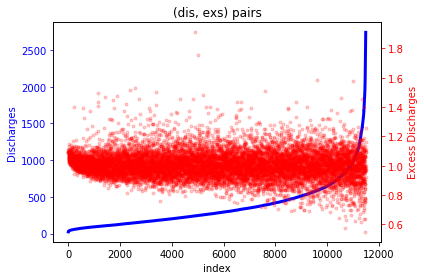

In [243]:

fig, ax1 = plt.subplots()

x = np.arange(len(df))
y1 = np.array(df.dis)

ax1.plot(x, y1, color='blue', linewidth=3)
ax1.set_xlabel('index')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Discharges', color='blue')
ax1.tick_params('y', colors='blue')

ax2 = ax1.twinx()
y2 = np.array(df.exs)
ax2.plot(x, y2, marker='.', color='red', linestyle='None', alpha=0.2)
ax2.set_ylabel('Excess Discharges', color='red')
ax2.tick_params('y', colors='red')

plt.title('(dis, exs) pairs')

plt.tight_layout()
plt.show()

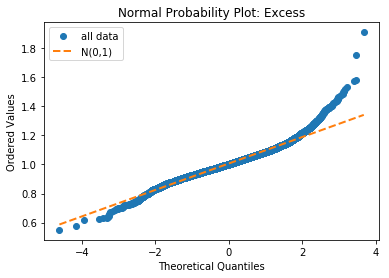

In [244]:
norm = np.sort(random.normal(0, 1, len(df.exs)))
_ = plt.plot(norm, np.sort(df.exs), 'o')

z = np.polyfit(norm, np.sort(df.exs), 1)
p = np.poly1d(z)

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Normal Probability Plot: Excess')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Ordered Values')
_ = plt.legend(['all data', 'N(0,1)'])

plt.show()


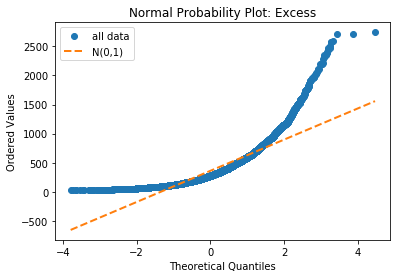

In [245]:
norm = np.sort(random.normal(0, 1, len(df.dis)))
_ = plt.plot(norm, np.sort(df.dis), 'o')

z = np.polyfit(norm, np.sort(df.dis), 1)
p = np.poly1d(z)

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Normal Probability Plot: Excess')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Ordered Values')
_ = plt.legend(['all data', 'N(0,1)'])

plt.show()

In [246]:
stats.pearsonr(np.array(df.dis), np.array(df.exs))

(-0.09309554287590438, 1.5022756426464526e-23)

In [247]:
stats.spearmanr(np.array(df.dis), np.array(df.exs))

SpearmanrResult(correlation=-0.076858037232686291, pvalue=1.5672494791925574e-16)

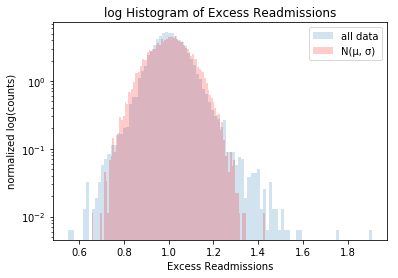

In [248]:
s = stats.norm.fit(df.exs)
ll = stats.norm.rvs(s[0],s[1],len(df.exs))
_ = plt.hist(df.exs, bins=100, normed=True, alpha=0.2)
_ = plt.hist(ll, bins=100, normed=True, color='red', alpha=0.2)
_ = plt.yscale('log')
_ = plt.ylabel('normalized log(counts)')
_ = plt.xlabel('Excess Readmissions')
_ = plt.title('log Histogram of Excess Readmissions')
_ = plt.legend(['all data', 'N(\u03BC, \u03C3)'])
plt.show()

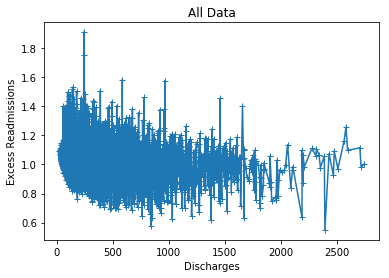

In [249]:
_ = plt.plot(df.dis, df.exs, marker='+', linestyle='solid')
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Excess Readmissions')
_ = plt.title('All Data')
plt.show()

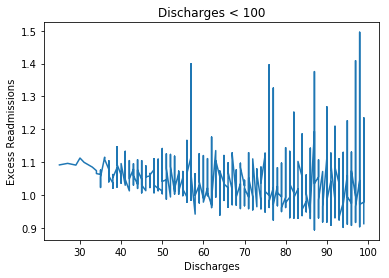

In [250]:
_ = plt.plot(df.dis[df.dis<100], df.exs[df.dis<100])
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Excess Readmissions')
_ = plt.title('Discharges < 100')
plt.show()

In [251]:
dfl = df[df.dis<100]
dfl.describe()

,dis,exs
count,1188.000000,1188.000000
mean,74.717172,1.022618
std,16.908819,0.057979
min,25.000000,0.893500
25%,62.000000,0.984900
50%,77.000000,1.017750
75%,89.000000,1.052925
max,99.000000,1.495300


In [252]:
print('Mean of \'exs\' with \'dis<100\': {:5.3f}'.format(dfl.exs.mean()))
print('Percent with \'dis<100\' and \'exs>1\': {:2.0f}%'.format((dfl['exs'][dfl.exs>1].count() / dfl['exs'].count()) *100))
print('Percent of all hospitals: {:2.0f}%'.format((dfl['exs'].count() /df['exs'].count()) *100))

Mean of 'exs' with 'dis<100': 1.023
Percent with 'dis<100' and 'exs>1': 63%
Percent of all hospitals: 10%


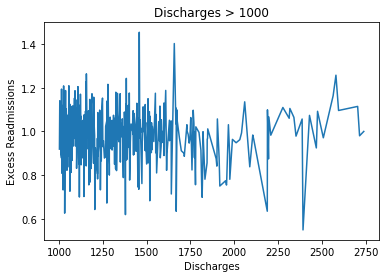

In [253]:
_ = plt.plot(df.dis[df.dis>1000], df.exs[df.dis>1000])
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Excess Readmissions')
_ = plt.title('Discharges > 1000')
plt.show()

In [254]:
dfh = df[df.dis>1000]
dfh.describe()

,dis,exs
count,460.000000,460.000000
mean,1361.269565,0.979073
std,350.438731,0.119358
min,1002.000000,0.549500
25%,1107.000000,0.909025
50%,1241.000000,0.986700
75%,1508.000000,1.057100
max,2740.000000,1.454300


In [255]:
print('Mean of \'exs\' with \'dis>1000\': {:5.3f}'.format(dfh.exs.mean()))
print('Percent with \'dis>1000\' and \'exs>1\': {:2.0f}%'.format((dfh['exs'][dfh.exs>1].count() / dfh['exs'].count()) *100))
print('Percent of all hospitals: {:2.0f}%'.format((dfh['exs'].count() /df['exs'].count()) *100))

Mean of 'exs' with 'dis>1000': 0.979
Percent with 'dis>1000' and 'exs>1': 45%
Percent of all hospitals:  4%


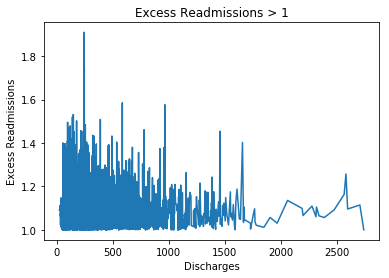

In [256]:
_ = plt.plot(df.dis[df.exs>1], df.exs[df.exs>1])
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Excess Readmissions')
_ = plt.title('Excess Readmissions > 1')
plt.show()

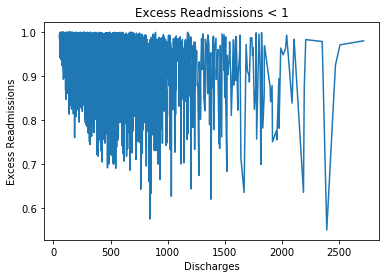

In [257]:
_ = plt.plot(df.dis[df.exs<1], df.exs[df.exs<1])
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Excess Readmissions')
_ = plt.title('Excess Readmissions < 1')
plt.show()

In [258]:
print('Mean of \'exs\': {:5.3f}'.format(df.exs.mean()))
print('Percent with \'exs>1\': {:2.0f}%'.format((df['exs'][df.exs>1].count() / df['exs'].count()) *100))

Mean of 'exs': 1.008
Percent with 'exs>1': 52%


In [259]:
#stats.probplot(df.exs,plot=plt)

In [260]:
def draw_bs_reps(df, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    p = np.empty(size)

    # Generate replicates
    for i in range(size):
        choice = np.random.choice(df.index, size=len(df.index))
        bs_replicates[i], p[i] = stats.pearsonr(np.array(df.loc[choice].dis), np.array(df.loc[choice].exs))

    return bs_replicates, p

In [261]:
bs_replicates, p = draw_bs_reps(df, size=10000)

In [262]:
lo, hi = np.percentile(np.sort(bs_replicates), (2.5, 97.5))

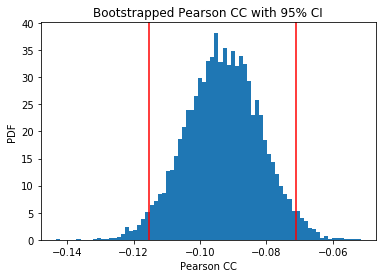

In [263]:
_ = plt.hist(bs_replicates, bins=75, normed=True)
_ = plt.axvline(x=lo, color='red')
_ = plt.axvline(x=hi, color='red')
_ = plt.xlabel('Pearson CC')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrapped Pearson CC with 95% CI')

plt.show()

In [264]:
print('{:g}'.format(max(p)))

2.99456e-08


In [265]:
print('Pearson CC 95% CI: {0:5.2f} to {1:5.2f}'.format(lo, hi))

Pearson CC 95% CI: -0.12 to -0.07


In [266]:
stats.tmean(bs_replicates)

-0.09304807352400743

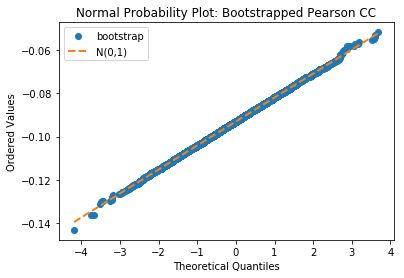

In [267]:
norm = np.sort(random.normal(0, 1, len(bs_replicates)))
_ = plt.plot(norm, np.sort(bs_replicates), 'o')

z = np.polyfit(norm, np.sort(bs_replicates), 1)
p = np.poly1d(z)

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Normal Probability Plot: Bootstrapped Pearson CC')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Ordered Values')
_ = plt.legend(['bootstrap', 'N(0,1)'])

plt.show()


In [286]:
def draw_perm_reps(data, size=1):
    """Draw perm replicates."""

    # Initialize array of replicates: bs_replicates
    perm_replicates = np.empty(size)
    p = np.empty(size)

    # Generate replicates
    for i in range(size):
        perm = np.random.permutation(df.exs)
        perm_replicates[i], p[i] = stats.pearsonr(np.array(df.dis), perm)

    return perm_replicates, p

In [287]:
perm_replicates, p = draw_perm_reps(df, size=10000)

In [291]:
r0, p0 = stats.pearsonr(np.array(df.dis), np.array(df.exs))

In [289]:
p = np.sum(perm_replicates >= r0)/len(perm_replicates)
print('p-val =', p)

p-val = 1.0


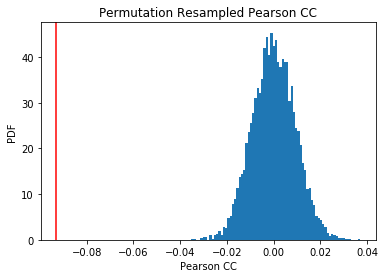

In [292]:
_ = plt.hist(perm_replicates, bins=75, normed=True)
_ = plt.axvline(x=r0, color='red')
#_ = plt.axvline(x=hi, color='red')
_ = plt.xlabel('Pearson CC')
_ = plt.ylabel('PDF')
_ = plt.title('Permutation Resampled Pearson CC')
# Show the plot
plt.show()

In [293]:
p0

1.5022756426464526e-23

In [294]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


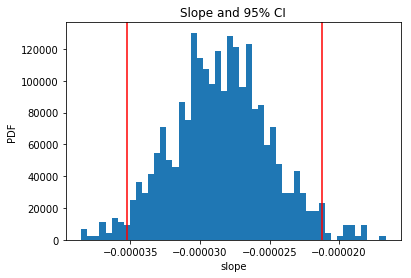

In [307]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(np.array(df.dis), np.array(df.exs), size=1000)

# Compute and print 95% CI for slope
lo1, hi1 = np.percentile(bs_slope_reps, [2.5, 97.5])

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.axvline(x=lo1, color='red')
_ = plt.axvline(x=hi1, color='red')
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
_ = plt.title('Slope and 95% CI')
plt.show()

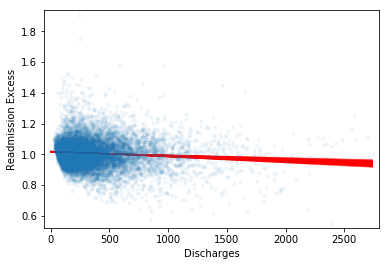

In [309]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, max(df.dis)])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')
              
# Plot the data
_ = plt.plot(np.array(df.dis), np.array(df.exs), marker='.', linestyle='none', alpha=0.05)

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Discharges')
_ = plt.ylabel('Readmission Excess')
plt.margins(0.02)
plt.show()

In [274]:
#norm = np.sort(random.lognormal(0, 1, len(dfl.exs)))
#s = stats.lognorm.fit(dfl.exs)
#norm = np.sort(random.lognormal(s[1], s[2], len(dfl.exs)))
#_ = plt.plot(norm, np.sort(dfl.exs), 'o')

#z = np.polyfit(norm, np.sort(dfl.exs), 1)
#p = np.poly1d(z)

#_ = plt.plot(norm, p(norm), '--', linewidth=2)

#_ = plt.title("Normal Q-Q plot: Excess (Dis<100)")
#_ = plt.xlabel("Theoretical quantiles")
#_ = plt.ylabel("Expreimental quantiles")
#_ = plt.legend(['all data', 'N(0,1)'])
#_ = plt.xlim(-0.5, 15)

#plt.show()


In [275]:
stats.pearsonr(dfl.dis, dfl.exs)

(-0.24463550033476247, 1.1955927845532681e-17)

In [276]:
dfh = df[df.dis>1000]

In [277]:
stats.pearsonr(dfh.dis, dfh.exs)

(-0.021222171948945972, 0.64984494867154008)

In [278]:
dfh.describe()

,dis,exs
count,460.000000,460.000000
mean,1361.269565,0.979073
std,350.438731,0.119358
min,1002.000000,0.549500
25%,1107.000000,0.909025
50%,1241.000000,0.986700
75%,1508.000000,1.057100
max,2740.000000,1.454300


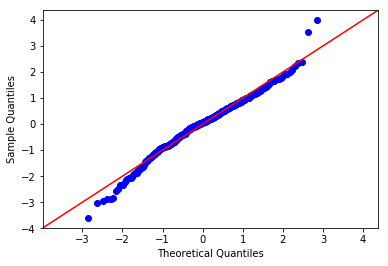

In [279]:
_ = sm.qqplot(np.sort(dfh.exs), dist=stats.norm, fit=True, line='45')
plt.show()

In [280]:
#s = stats.lognorm.fit(dfl.exs)
#ll = stats.lognorm.rvs(s[0],s[1],s[2],len(dfl.exs))
#_ = plt.hist(ll, bins=15, normed=True, alpha=0.2)
#_ = plt.hist(dfl.exs, bins=15, normed=True, color='red', alpha=0.2)
#_ = plt.ylim(0, 10)
#plt.show()

In [281]:
exs_meanl = np.mean(dfl.exs)
exs_meanl

1.0226183501683508

In [282]:
exs_stdl = np.std(dfl.exs)
exs_stdl

0.05795419632801005

In [283]:
n = len(dfl.exs)
n

1188

In [284]:
exs_seml = stats.sem(dfl.exs)
exs_seml

0.0016821298911009841

In [285]:
stats.norm.ppf(.99, exs_meanl, exs_seml)

1.0265315694643742